# Plotting and Analysis of Non-Divergent Sets
Nathan Pacey, 18njp@queensu.ca

## Modified Mandelbrot set.

### Find expressions for xn+1 and yn+1 in terms of xn, yn, a and b:


$$z_{n+1} = e^{z_n} + c$$
$$z_n = x_n + i y_n$$
$$c = a+ib$$

If we sub z_n into z_n+1
$$z_{n+1} = e^{x_n + i y_n} + c$$
Then use Euler's Identity:
$$z_{n+1} = e^{x_n + i y_n} + c = e^{x_n} cos(y_n) + i e^{x_n} sin(y_n) + c$$
if we sub in for c:
$$z_{n+1} = e^{x_n} cos(y_n) + i e^{x_n} sin(y_n) + a +i b$$

We can seperate **Real** and **Imaginary** terms and get an expression in the for z = x + iy:

$$z_{n+1} = e^{x_n} cos(y_n)+a + i (e^{x_n} sin(y_n)+b)$$

If $$z_{n+1} = x_{n+1} + i y_{n+1}$$ **Therefore:**
**$$x_{n+1} = e^{x_n} cos(y_n)+a$$** And 
**$$y_{n+1} = e^{x_n} sin(y_n)+b$$**

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

# adding a color gradient to a scatter plot
import mpl_scatter_density 
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# set up color mapping list using mpl-scatter-density
# color mapping code white background viridis colors
# from https://github.com/astrofrog/mpl-scatter-density
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

#color mapping func, takes in a.fig and projects color density
def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')

Modified recusive algorithm (modified Mandelbrot) of form $$z = e^z +c$$ where $$c = x +iy$$

**Note that I chose to represent 0 as being in the set and 1 as outside the set.** This makes it easier to visualize the scatter plot set (and also requires less points along the edges of the set.

I chose to check for divergence at a threshold of **A = 100**, since this gives a accurate dipiction of the set without too much computing power required. For a similar reason I chose an **N depth of checking of 100** to check for divergence.

/opt/conda/lib/python3.9/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/opt/conda/lib/python3.9/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


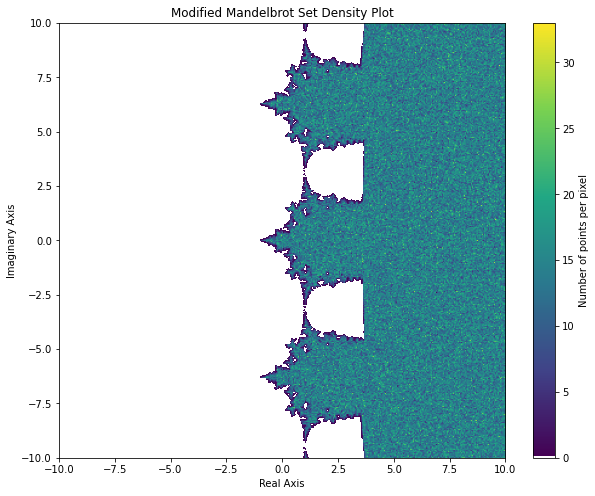

In [3]:

# modified recusive algorithm of form z = e^z +c
def modified_mandelbrot_set(c, N=100, A=100, z=0):
    for n in range(1, N):
        if abs(z) > A:
            return 1
        z = np.exp(z) + c
    return 0

# function to call and plot the modified_mandelbrot_set algorithm 
def modified_mandelbrot_call(axis_size,density,x_offset=0, y_offset=0, count = 0, points=200000,resize=False):
    
    # c is in the form c = x +iy, where x and y are a set of random points in a set range
    c = 2*axis_size*(np.random.rand(points)-0.5)+x_offset+1j*2*axis_size*(np.random.rand(points)-0.5)+y_offset
    
    complex_arr=np.zeros(points,dtype=complex) # array to store the algorithm values, init at zero to save time
    
    # populate the complex array with the points in which the modified_mandelbrot_set is 1:
    for i in range(points):
        if modified_mandelbrot_set(c[i]):
            complex_arr[count] = c[i]
            count +=1 #iterate the counter
    
    # option to just print a scatter and not a density plot
    if(not density):
        plt.plot(np.real(complex_arr[:count]),np.imag(complex_arr[:count]),"o",ms=.05)
        plt.xlabel("Real Axis")
        plt.ylabel("Imaginary Axis")
        plt.show()
        
    else: # print a the density plot
        using_mpl_scatter_density(plt.figure(figsize=(10,8)), np.real(complex_arr[:count]), np.imag(complex_arr[:count]))
        
        if resize: # option to resize the axis
            plt.axis([-axis_size,axis_size,-axis_size,axis_size])
            
        plt.title("Modified Mandelbrot Set Density Plot")
        plt.xlabel("Real Axis")
        plt.ylabel("Imaginary Axis")
        plt.show()
        
    
modified_mandelbrot_call(10,True,points=2000000, resize=True)

### Discuss any periodicity that you notice in the figure.

The set seems to be repeating periodicly in a few different ways. The most obviose repitions are the notches along the curved axis. 
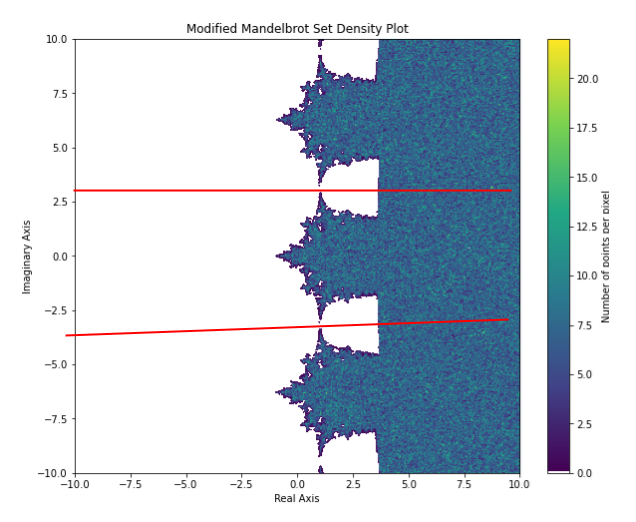

Another repition is within each notch there is symetrical patterns along the points that seem to be forming their own periodicaly repeated notches:

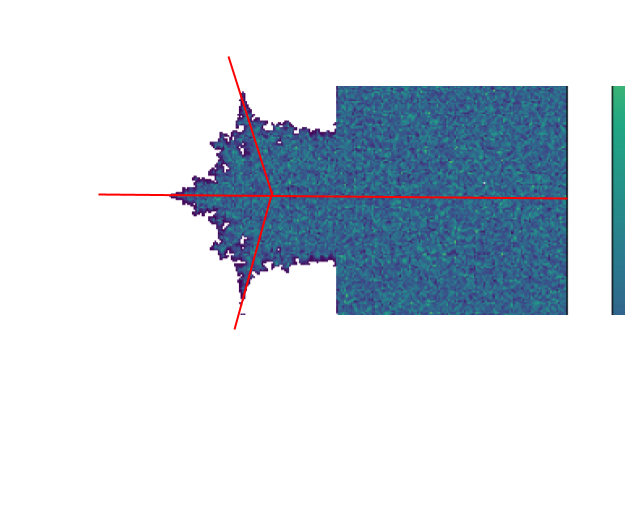

### Try zooming into a region of the complex plane near the boundary of the set and you’ll see more and more detail.

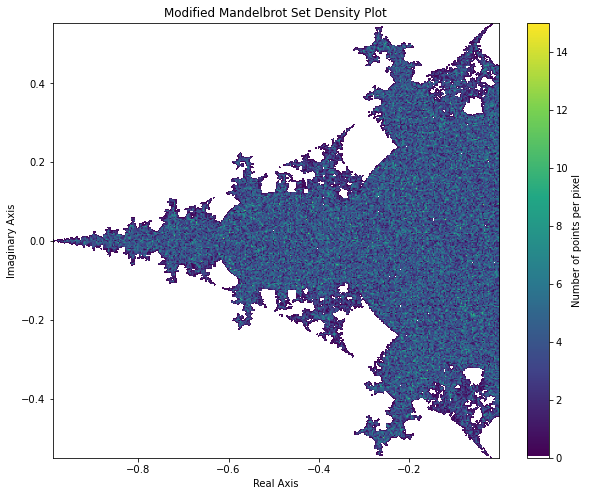

In [4]:
modified_mandelbrot_call(1,True,x_offset=-1, points=2000000)

When we zoom in on the points of these notches we can see similar patterns forming along the edges. The pointed end of the notches seems to be a reapted pattern of curved circle like objects with their own smaller notches and repeated points.
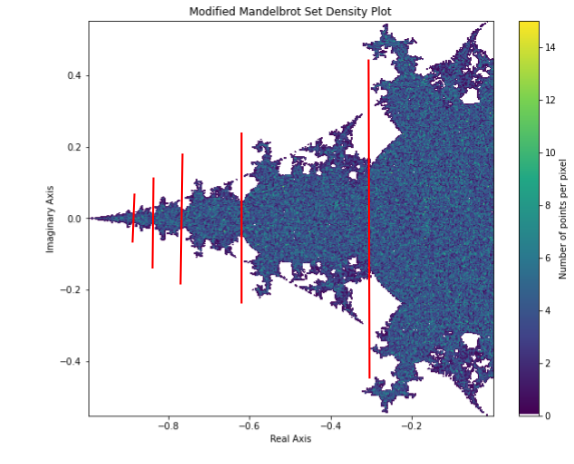



### Zooming out to see the contained set

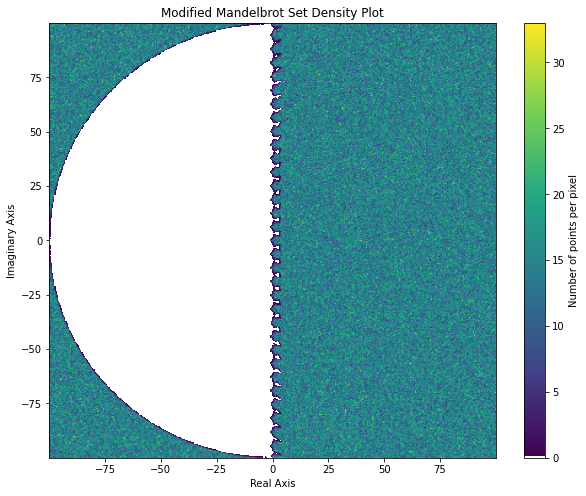

In [5]:
modified_mandelbrot_call(100,True,points=2000000)

When we zoom out to see the entire set we can see the notches along the rigid end of the set.

## Julia Set
Julia set is represented by $$z_{n+1} = z_{n}^2 +c$$
Generate the Julia set for $$c = −0.83 + 0.18i$$

**Note that I chose to represent 1 as being in the set and 0 as outside the set.**

I chose to check for divergence at a threshold of A = 5, and a N depth of checking of 100.

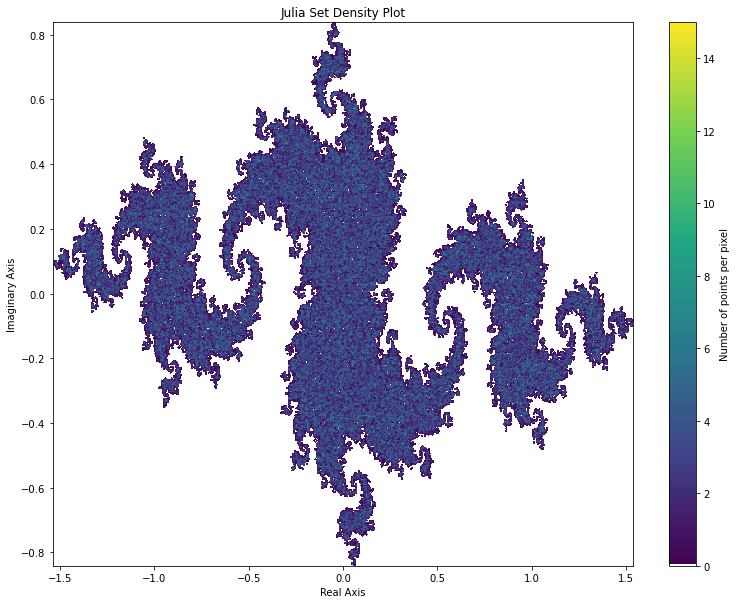

In [6]:
# algorithm of Julia set plot
def julia_alg(z,c,N=100,A=5):
    for i in range(N):
        if np.abs(z) > A:
            return 0
        z=z**2+c
    return 1

# function to call the julia algorith and plot
#defined c = x+iy for Julia set
def julia_set_call(density,axis_size=4,count=0, points=1000000, c = -0.83 + 0.18j):
    
    # this is z in the form z = c = x +iy, where x and y are random points in a given range
    z = axis_size*(np.random.rand(points)-0.5) + 1j*axis_size*(np.random.rand(points)-0.5)
    complex_arr = np.zeros(points,dtype=complex) # array to store the algorithm values, init at zero to save time
    
    # populate the complex array with the points in which the modified_mandelbrot_set is 1:
    for i in range(points):
        if julia_alg(z[i],c):
            complex_arr[count] = z[i]
            count+=1 #iterate the counter
            
    # option to just print a scatter and not a density plot
    if(not density):
        plt.plot(np.real(complex_arr[:count]),np.imag(complex_arr[:count]),"o",ms=.05)
        plt.xlabel("Real Axis")
        plt.ylabel("Imaginary Axis")
        plt.show()
        
    else: # print a the density plot
        using_mpl_scatter_density(plt.figure(figsize=(13,10)), np.real(complex_arr[:count]), np.imag(complex_arr[:count]))
        plt.title("Julia Set Density Plot")
        plt.xlabel("Real Axis")
        plt.ylabel("Imaginary Axis")
        plt.show()
        
        
#call function and plot
julia_set_call(True, points=2000000)

This set matches the heat map visualization from https://sciencedemos.org.uk/julia.php

When putting in $$x_0 = -0.83,  y_0 = 0.18$$
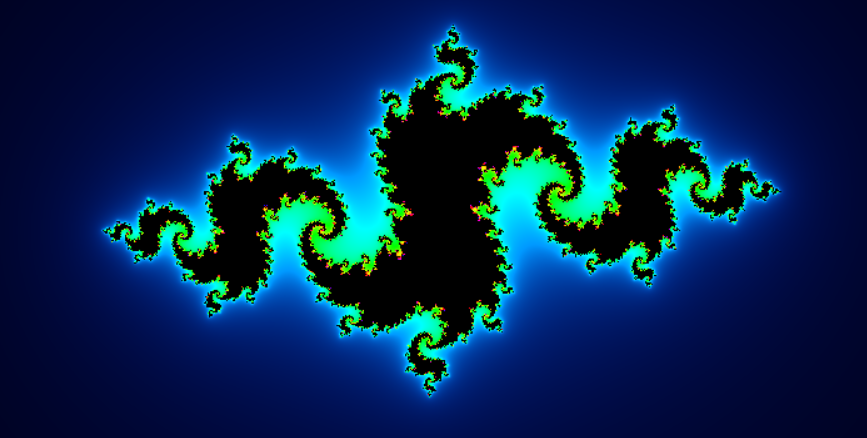